### <h1 align="center">CPSC 4830</h1>
<h2 align="center">MIDTERM</h2>
<h2 align="center">TIME - 2 HR 30 MIN</h2>
<h2 align="center">START TIME - 3.30 PM, END TIME - 6.00 PM</h2>
<h2 align="center">MAX MARKS - 20</h2>

<h2 align="center">All work must be completed in this file and Submit the resulting .ipynb in D2L</h2>

<h2 align="center"> Absolutely No Collaboration. Solutions with 90% and above similarity would be investigated further for possible plagiarism and cheating. If found guilty, then collobarators would be assigned a grade of 0 without any grades even for non cheated part.</h2>


### Q1. The SMS Spam Collection is a set of SMS tagged messages that have been collected from SMS Spam research database. It contains one set of SMS messages in English of 5,572 messages, tagged acording being ham (legitimate) or spam.

### Out of the 5572 sets of sms messages, approximately 20% of the messages have been trimmed and kept aside for Evaluating your model by the Instructor. You only have 4458 rows to build your model. Rest will be used by the instructor as a blind evaluation of your model. This data is not provided to you.

### Use this dataset to build a prediction model as follows that will accurately classify which texts are spam? 

### Use Logistic Regression with L2 Regularisation and CV (K=3) (using your intelligent choice of Hyperparameters), find the accuracy of SPAM/HAM detection. [10 Marks]

In [ ]:
# Start Here for Q1

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sms = pd.read_csv('spamhamtrain.csv') # import dataset

In [ ]:
sms.shape

(4457, 2)

In [ ]:
sms.head() # check first 5 rows

,Category,Message
0,ham,"K I'm leaving soon, be there a little after 9"
1,ham,No. Yes please. Been swimming?
2,ham,It took Mr owl 3 licks
3,ham,Its going good...no problem..but still need li...
4,ham,K.. I yan jiu liao... Sat we can go 4 bugis vi...


In [ ]:
sms['Category'].unique() # check unique values for the response variable

array(['ham', 'spam'], dtype=object)

In [ ]:
sms.info() # check objects, number of rows and cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4457 entries, 0 to 4456
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  4457 non-null   object
 1   Message   4457 non-null   object
dtypes: object(2)
memory usage: 69.8+ KB


In [ ]:
sms.describe() # summary of statistics

,Category,Message
count,4457,4457
unique,2,4157
top,ham,"Sorry, I'll call later"
freq,3863,26


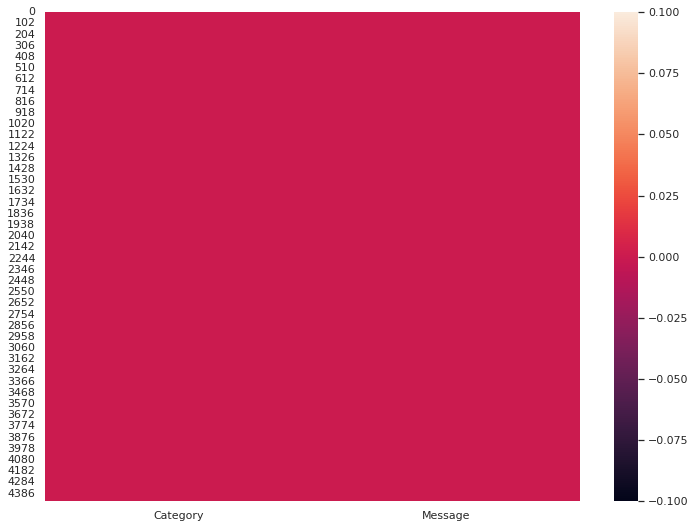

In [ ]:
# map missing data
sns.set(rc={'figure.figsize':(12,9)}) # set graph size
sns.heatmap(sms.isnull()) # white line means missing

no missing

In [ ]:
# check for duplicate values
sms.duplicated().sum()

300

In [ ]:
sms = sms.drop_duplicates(keep='first') # drop all duplicate

In [ ]:
# check for duplicate values
sms.duplicated().sum()

0

no duplicates

In [ ]:
sms.shape

(4157, 2)

In [ ]:
sms['Category'].unique() # check unique values for response variable

array(['ham', 'spam'], dtype=object)

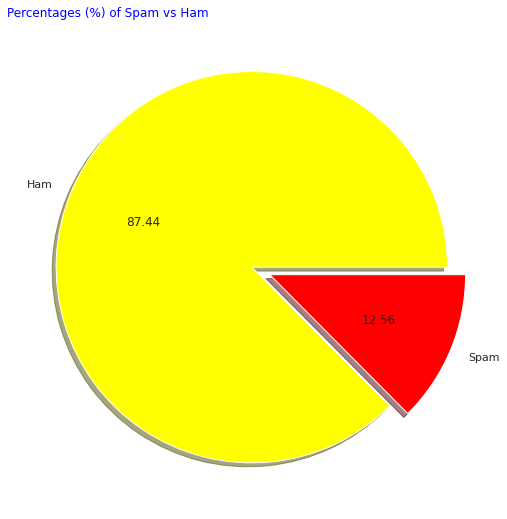

In [ ]:
# check percentage of ham and spam observations
plt.title("Percentages (%) of Spam vs Ham", color="blue", loc="left", )
plt.pie(sms.Category.value_counts(), labels=["Ham","Spam"], colors=[ "yellow","red"], autopct="%0.2f", explode=(0, 0.1), shadow=True)
plt.show()

In [ ]:
# Convert Category (response varaible) into 0 and 1
sms['Category'] = pd.factorize(sms.Category)[0]
sms['Category'].unique() # check unique values for response variable

array([0, 1])

In [ ]:
# check message lenght
sms['number of char'] = sms['Message'].apply(len)
sms.head()

,Category,Message,number of char
0,0,"K I'm leaving soon, be there a little after 9",45
1,0,No. Yes please. Been swimming?,30
2,0,It took Mr owl 3 licks,22
3,0,Its going good...no problem..but still need li...,102
4,0,K.. I yan jiu liao... Sat we can go 4 bugis vi...,155


In [ ]:
sms['Message'] = sms['Message'].str.replace(r'[^\w\s]+', '') # drop comma, period, etc sign in the variable
sms.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Category,Message,number of char
0,0,K Im leaving soon be there a little after 9,45
1,0,No Yes please Been swimming,30
2,0,It took Mr owl 3 licks,22
3,0,Its going goodno problembut still need little ...,102
4,0,K I yan jiu liao Sat we can go 4 bugis vill on...,155


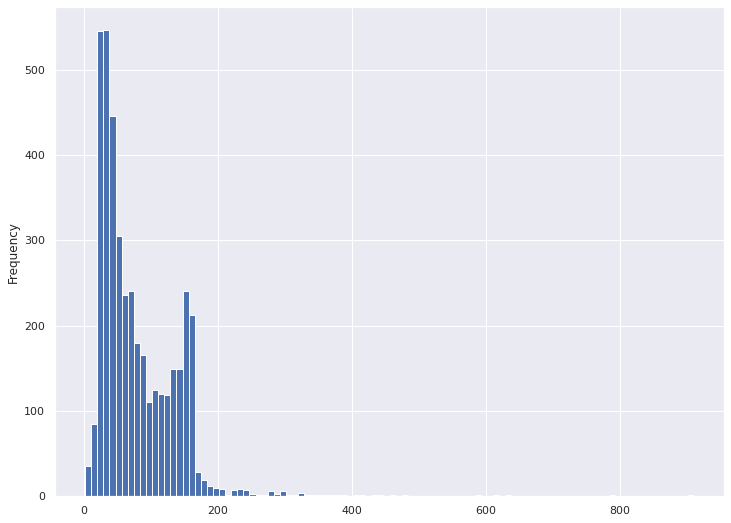

In [ ]:
sms['number of char'].plot(bins=100, kind='hist') 

number of character ranges from 0 to 200

In [ ]:
# vectorize message variable to create dataset which counts unique words as column per observations
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
sms_vectorizer = vectorizer.fit_transform(sms['Message'])

In [ ]:
sms_vectorizer.shape # shape of new dataset

(4157, 8385)

In [ ]:
print(vectorizer.get_feature_names()) # check variables

['008704050406', '0089my', '0121', '01223585236', '01223585334', '0125698789', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18s', '0870', '08700621170150p', '08701213186', '08701237397', '08701417012', '08701417012150p', '0870141701216', '087

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
# Logistic Regression - Cross Validation with Ridge penalty
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV(cv=3, solver='lbfgs', penalty="l2", max_iter=100, multi_class='auto')

In [ ]:
model.fit(X_train,y_train) # fit model

LogisticRegressionCV(cv=3)

In [ ]:
y_pred = model.predict(X_test) # predict model on test set

In [ ]:
from sklearn import metrics

cmatrix = metrics.confusion_matrix(y_test, model.predict(X_test))
cmatrix1 = pd.DataFrame(cmatrix)
cmatrix1.columns = ['Actual - ham', 'Actual - spam']
cmatrix1.index = ['Predict - ham', 'Predict - spam']
cmatrix1

,Actual - ham,Actual - spam
Predict - ham,1092,4
Predict - spam,24,128


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix # check model accuracy
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1096
           1       0.97      0.84      0.90       152

    accuracy                           0.98      1248
   macro avg       0.97      0.92      0.94      1248
weighted avg       0.98      0.98      0.98      1248



accuracy of the model at k = 3 is at 99%

In [ ]:
# Cross Validation for k from 1 to 3
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=3)
accuracy_score = pd.DataFrame(accuracy)
accuracy_score.index = ['k=1', 'k=2', 'k=3']
accuracy_score.columns = ['Accuracy']
accuracy_score

,Accuracy
k=1,0.969072
k=2,0.974227
k=3,0.972136


Model predicted very well even at k = 1 it can predict up to 96.9%

### Q2. Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk. 

### The data file credit_card_application.csv contains all the details collected from different customers whose attributes are explained in the table below. 

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-cly1{text-align:left;vertical-align:middle}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-cly1">Feature name</th>
    <th class="tg-cly1">Explanation</th>
    <th class="tg-cly1">Remarks</th>
  </tr>
  <tr>
    <td class="tg-cly1">ID</td>
    <td class="tg-cly1">client number</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'CODE_GENDER'</td>
    <td class="tg-cly1">gender</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'FLAGOWNCAR'</td>
    <td class="tg-cly1">Is there a car</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'FLAGOWNREALTY'</td>
    <td class="tg-cly1">Is there a property</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'CNT_CHILDREN'</td>
    <td class="tg-cly1">Number of children</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'AMTINCOMETOTAL'</td>
    <td class="tg-cly1">Annual income</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'NAMEINCOMETYPE'</td>
    <td class="tg-cly1">Income category</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'NAMEEDUCATIONTYPE'</td>
    <td class="tg-cly1">education level</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'NAMEFAMILYSTATUS'</td>
    <td class="tg-cly1">Marital status</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'NAMEHOUSINGTYPE'</td>
    <td class="tg-cly1">Way of living</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'DAYS_BIRTH'</td>
    <td class="tg-cly1">birthday</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'DAYS_EMPLOYED'</td>
    <td class="tg-cly1">Start date</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'FLAG_MOBIL'</td>
    <td class="tg-cly1">Is there a mobile phone</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'FLAGWORKPHONE'</td>
    <td class="tg-0lax">Is there a work phone</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'FLAG_PHONE'</td>
    <td class="tg-0lax">Is there a phone</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'FLAG_EMAIL'</td>
    <td class="tg-0lax">Is there an email</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'OCCUPATION_TYPE'</td>
    <td class="tg-0lax">Occupation</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'CNTFAMMEMBERS'</td>
    <td class="tg-0lax">Family size</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">begin_month</td>
    <td class="tg-0lax">record month</td>
    <td class="tg-0lax">The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on</td>
  </tr>
  <tr>
    <td class="tg-0lax">target</td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">1 for high risk and 0 for low risk</td>
  </tr>
</table>


### Use PCA to find the principle components of the given data. Find the retained variance of the data and how much is lost due to applying PCA. If required drop the Null values in the column and get rid of unnecessary categorical columns before applying PCA. 
### Explain each step including why some columns are to be dropped before applying PCA. Scaling is necessary and must be applied here.

### [10 Marks]

In [ ]:
# Start Here for Q2

In [ ]:
card = pd.read_csv('credit_card_application.csv')

In [ ]:
card.head() # check first 5 rows

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-15,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-14,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,-29,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-4,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,-26,0


In [ ]:
card.info() # check objects, number of rows and cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [ ]:
# checking the total no of datatype columns

print("Total no of int64 dtype columns , ",card.select_dtypes(include=["int64"]).columns.shape[0])
print("Total no of float64 dtype columns , ",card.select_dtypes(include=["float64"]).columns.shape[0])
print("Total no of object dtype columns , ",card.select_dtypes(include=["object"]).columns.shape[0])

Total no of int64 dtype columns ,  11
Total no of float64 dtype columns ,  1
Total no of object dtype columns ,  8


In [ ]:
card['target'].unique() # check unique values for the response variable

array([0, 1])

In [ ]:
card.describe() # summary of statistics

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,begin_month,target
count,3.645700e+04,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.430315,1.866857e+05,-15975.173382,59262.935568,1.0,0.225526,0.294813,0.089722,2.198453,-26.164193,0.016897
std,4.187524e+04,0.742367,1.017892e+05,4200.549944,137651.334859,0.0,0.417934,0.455965,0.285787,0.911686,16.501854,0.128886
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042028e+06,0.000000,1.215000e+05,-19438.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074614e+06,0.000000,1.575000e+05,-15563.000000,-1552.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.115396e+06,1.000000,2.250000e+05,-12462.000000,-408.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


In [ ]:
# check features with possible binary responses based on the result of summary of statistics
print(card['CNT_CHILDREN'].unique())

print(card['FLAG_MOBIL'].unique())

print(card['FLAG_WORK_PHONE'].unique())

print(card['FLAG_PHONE'].unique())

print(card['FLAG_EMAIL'].unique())

print(card['target'].unique() )

[ 0  1  3  2  4  5 14 19  7]
[1]
[1 0]
[0 1]
[0 1]
[0 1]


Following should be considered categorical variables:
1. FLAG_MOBIL
2. FLAG_WORK_PHONE
3. FLAG_PHONE
4. FLAG_EMAIL
5. target

In [ ]:
# change Dtype of numerical to object
card['ID'] = card['ID'].astype(object) 
card['FLAG_MOBIL'] = card['FLAG_MOBIL'].astype(object) 
card['FLAG_WORK_PHONE'] = card['FLAG_WORK_PHONE'].astype(object) 
card['FLAG_PHONE'] = card['FLAG_PHONE'].astype(object) 
card['FLAG_EMAIL'] = card['FLAG_EMAIL'].astype(object) 
card['target'] = card['target'].astype(object) 

In [ ]:
print(card['ID'].dtype)
print(card['FLAG_MOBIL'].dtype)
print(card['FLAG_WORK_PHONE'].dtype)
print(card['FLAG_PHONE'].dtype)
print(card['FLAG_EMAIL'].dtype)
print(card['target'].dtype)

object
object
object
object
object
object


In [ ]:
# checking the total no of datatype columns

print("Total no of int64 dtype columns , ",card.select_dtypes(include=["int64"]).columns.shape[0])
print("Total no of float64 dtype columns , ",card.select_dtypes(include=["float64"]).columns.shape[0])
print("Total no of object dtype columns , ",card.select_dtypes(include=["object"]).columns.shape[0])

Total no of int64 dtype columns ,  5
Total no of float64 dtype columns ,  1
Total no of object dtype columns ,  14


In [ ]:
card.describe() # summary of statistics

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,begin_month
count,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000
mean,0.430315,1.866857e+05,-15975.173382,59262.935568,2.198453,-26.164193
std,0.742367,1.017892e+05,4200.549944,137651.334859,0.911686,16.501854
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.000000,-60.000000
25%,0.000000,1.215000e+05,-19438.000000,-3153.000000,2.000000,-39.000000
50%,0.000000,1.575000e+05,-15563.000000,-1552.000000,2.000000,-24.000000
75%,1.000000,2.250000e+05,-12462.000000,-408.000000,3.000000,-12.000000
max,19.000000,1.575000e+06,-7489.000000,365243.000000,20.000000,0.000000


In [ ]:
# select numerical variablez
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

card1 = card.select_dtypes(include=numerics) # create new dataset of numerical variables

In [ ]:
card1.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,begin_month
0,0,427500.0,-12005,-4542,2,-15
1,0,427500.0,-12005,-4542,2,-14
2,0,112500.0,-21474,-1134,2,-29
3,0,270000.0,-19110,-3051,1,-4
4,0,270000.0,-19110,-3051,1,-26


In [ ]:
card1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CNT_CHILDREN      36457 non-null  int64  
 1   AMT_INCOME_TOTAL  36457 non-null  float64
 2   DAYS_BIRTH        36457 non-null  int64  
 3   DAYS_EMPLOYED     36457 non-null  int64  
 4   CNT_FAM_MEMBERS   36457 non-null  int64  
 5   begin_month       36457 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1.7 MB


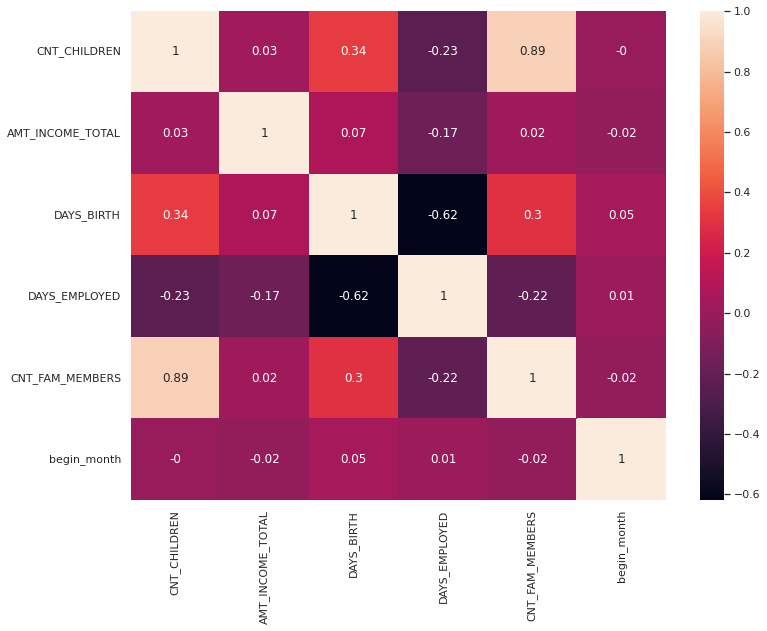

In [ ]:
# check for correlation

corr_matrix = card1.corr().round(2) # compute for correlation matrix but round off to 2 decimal places
sns.heatmap(data = corr_matrix, annot = True) # graph correlation matrix with corr values

few variables have possible mulitcollinearity

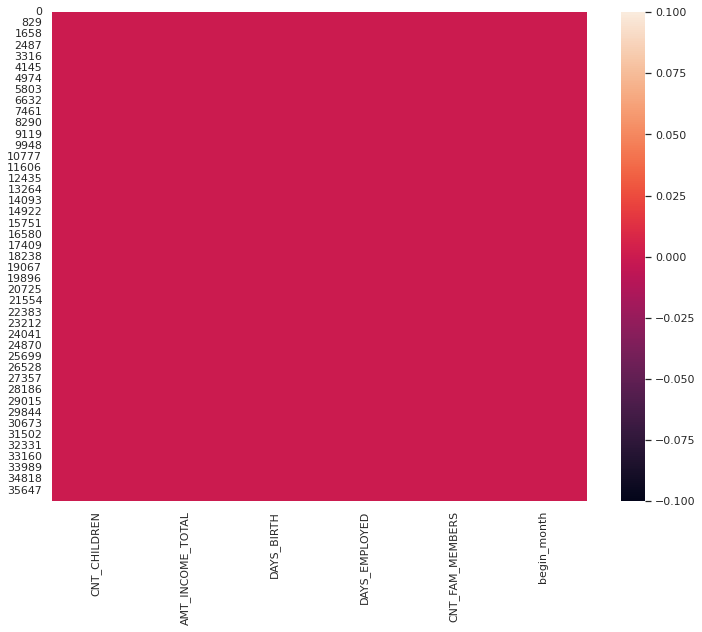

In [ ]:
# map missing data
sns.set(rc={'figure.figsize':(12,9)}) # set graph size
sns.heatmap(card1.isnull()) # white line means missing

no missing

In [ ]:
## Scaling or Standardization
from sklearn.preprocessing import StandardScaler # z-score scaling
scaler = StandardScaler()

scaler.fit(card1) # fit on X_Train set only. Set parameters for scaler()

# apply transform to both train X and Y using X_train statistical properties
card1_scale = scaler.transform(card1)

card1_scale.shape # check shape

(36457, 6)

In [ ]:
# RUN PCA
from sklearn.decomposition import PCA

# components will show based on 95% cummulative variance
pca = PCA(.90) 
pca.fit(card1_scale)

PCA(n_components=0.9)

In [ ]:
pca.n_components_ # number of components that meet 90% of the variance

4

In [ ]:
pca.explained_variance_ratio_ # individual variance of PCs is around 95% based on result of array

array([0.38878459, 0.2075048 , 0.16963113, 0.15473854])

based on the cut of of 90% cut point to retain information, cummulative variance for 4 principal components is at 92.07%. This means that 7.93% were lost.